<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

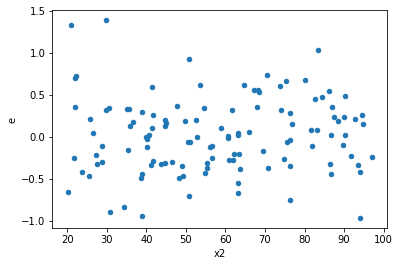

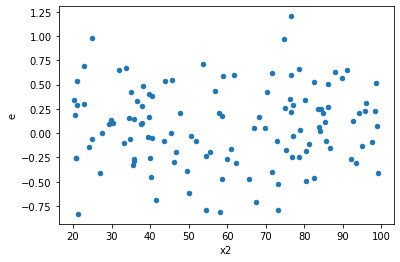

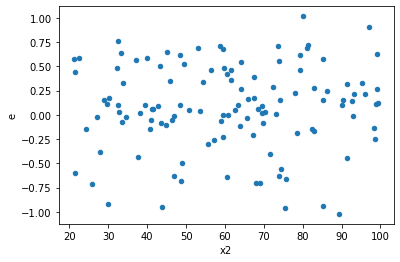

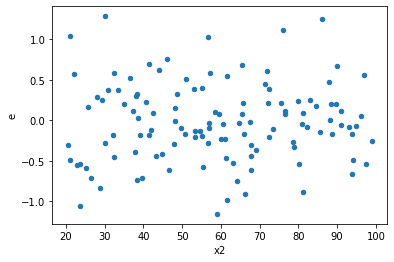

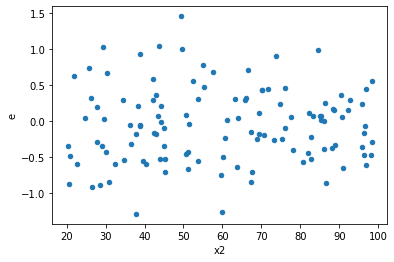

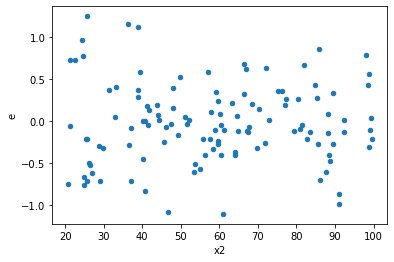

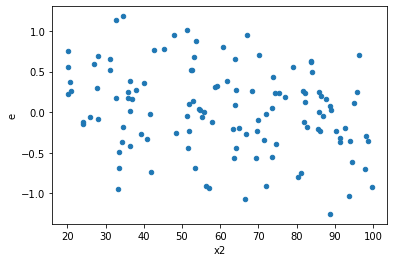

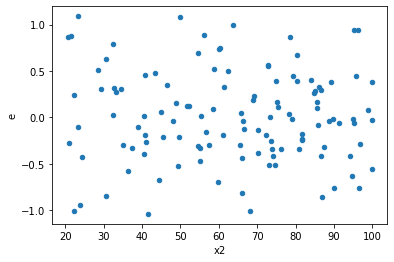

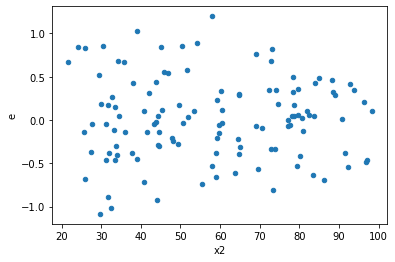

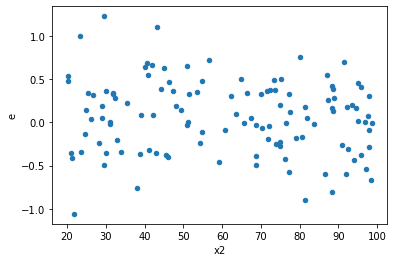

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,44.0,44.0,6.344740322923538,7.065543335485911,0.1441986437028077,0.16058053035195252,1.113606385112108,0.7227586212211681,0.638620689389416,0.36137931061058404,Reject001=1 : Homoscedasticity
2.0,44.0,44.0,7.928940421274394,10.153253336559601,0.18020319139259985,0.23075575764908185,1.2805309154949738,0.41539167277256905,0.7923041636137155,0.20769583638628453,Reject001=1 : Homoscedasticity
16.0,44.0,44.0,8.110346176894321,8.921866585484889,0.18432604947487094,0.20276969512465656,1.100059897677675,0.7531886729757398,0.6234056635121301,0.3765943364878699,Reject001=1 : Homoscedasticity
23.0,44.0,44.0,5.939046091293522,9.4868208703409,0.13497832025667097,0.21560956523502045,1.5973644124850819,0.12414031478576604,0.937929842607117,0.06207015739288302,Reject001=1 : Homoscedasticity
36.0,44.0,44.0,7.49080573976041,7.687158188319113,0.17024558499455478,0.1747081406436162,1.026212460365443,0.9319993177410437,0.5340003411294781,0.46599965887052186,Reject001=1 : Homoscedasticity
42.0,44.0,44.0,8.242414095879141,8.287091787957005,0.1873275930881623,0.18834299518084102,1.0054204619615266,0.98577646061787,0.507111769691065,0.492888230308935,Reject001=1 : Homoscedasticity
53.0,44.0,44.0,8.862261354970132,10.610194200683871,0.2014150307947757,0.2411407772882698,1.1972332766662839,0.5530095366537338,0.7234952316731331,0.2765047683268669,Reject001=1 : Homoscedasticity
54.0,44.0,44.0,6.967248984295821,10.817538158914333,0.15834656782490503,0.24585313997532576,1.5526268952490523,0.14842347064663652,0.9257882646766817,0.07421173532331826,Reject001=1 : Homoscedasticity
57.0,44.0,44.0,6.221317784944171,9.564681421984307,0.14139358602145843,0.21737912322691608,1.537404413761214,0.15765414867878413,0.9211729256606079,0.07882707433939207,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,10.265589403789274,7.95774221178985,0.23330885008611987,0.18085777754067842,0.7751860997725525,0.40165063638367315,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,6.344740322923538,7.065543335485911,0.1441986437028077,0.16058053035195252,1.113606385112108,0.7227586212211681,Reject001=1 : Homoscedasticity
2.0,44.0,44.0,7.928940421274394,10.153253336559601,0.18020319139259985,0.23075575764908185,1.2805309154949738,0.41539167277256905,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,12.125117042431084,9.157925123077774,0.2755708418734337,0.20813466188813123,0.7552855028970188,0.35545239422718744,Reject001=1 : Homoscedasticity
4.0,44.0,44.0,14.263316090854952,6.584589594915824,0.324166274792158,0.1496497635208142,0.46164507278483374,0.011783507944131908,Reject001=1 : Homoscedasticity
5.0,44.0,44.0,14.399691078934207,7.4160278778096185,0.3272657063394138,0.16854608813203678,0.5150129844562273,0.030094617734978894,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,12.072968290747784,9.645472161690186,0.27438564297154056,0.21921527640204969,0.798931292570533,0.4595860588862281,Reject001=1 : Homoscedasticity
7.0,44.0,44.0,12.844407745151662,8.63697154052966,0.29191835784435594,0.19629480773931043,0.6724305014211208,0.19205114381202984,Reject001=1 : Homoscedasticity
8.0,44.0,44.0,12.251877094971942,7.084947969451023,0.27845175215845325,0.16102154476025052,0.5782744892501918,0.07262053625395715,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      925
Reject001=0 : Heteroscedasticity     75
Name: Result_test, dtype: int64